In [24]:
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv("../Dataset/spotify_dataset_10k.csv")

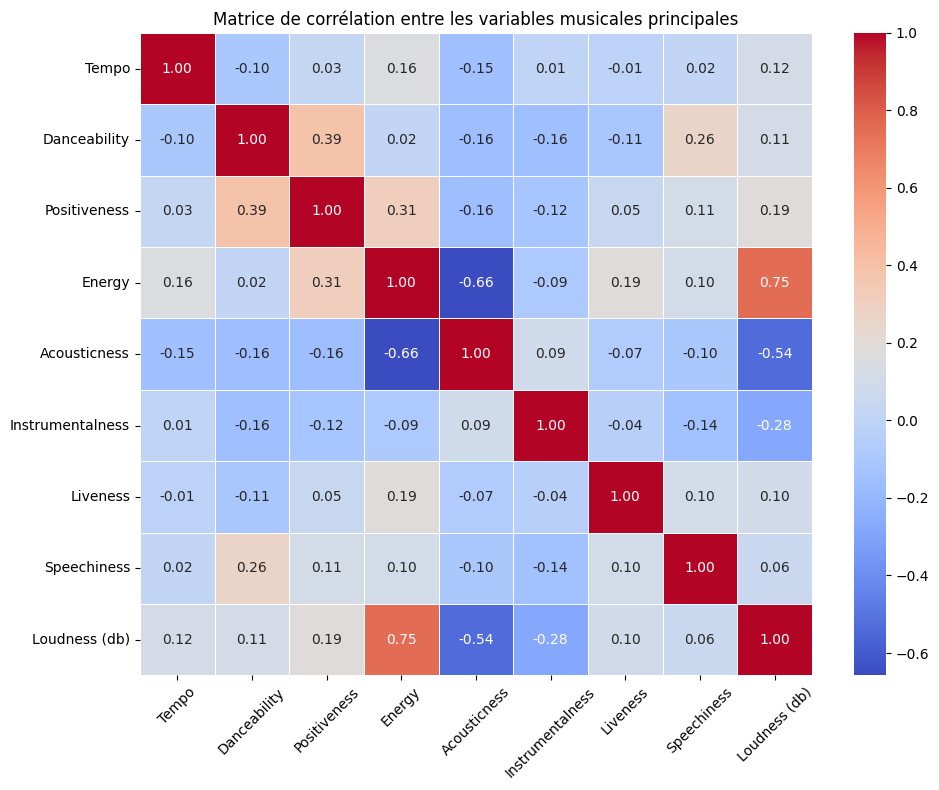

In [26]:
# Analyse et choix des audios
audio_features = [
    'Tempo', 'Key', 'Danceability', 'Positiveness', 'Energy',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness',
    'Loudness (db)'
]

# Calcul de la matrice de corrélation
corr_matrix = df[audio_features].corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables musicales principales")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

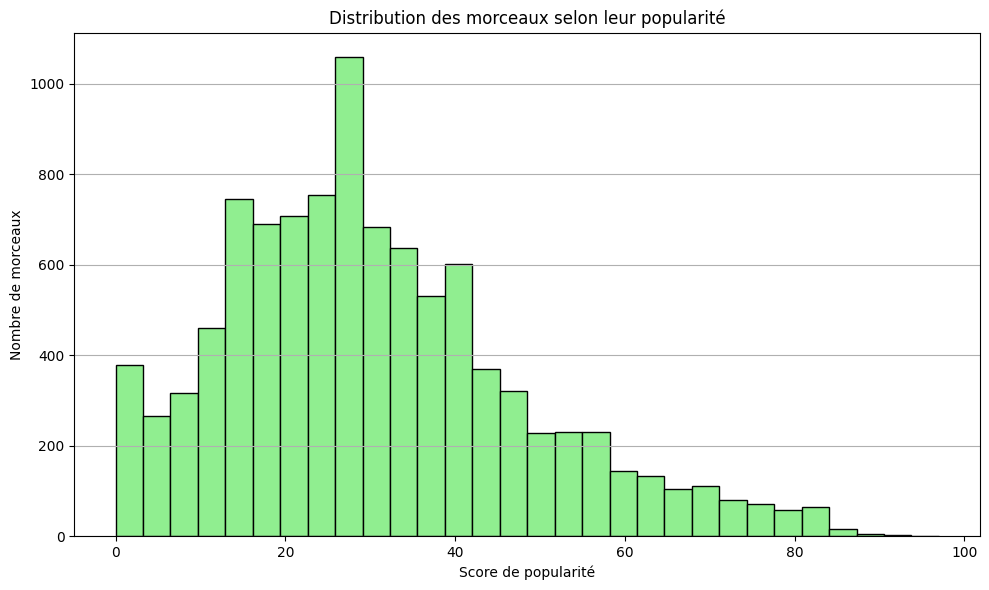

In [27]:
# Créer un histogramme de la popularité
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'].dropna(), bins=30, edgecolor='black', color='lightgreen')
plt.title("Distribution des morceaux selon leur popularité")
plt.xlabel("Score de popularité")
plt.ylabel("Nombre de morceaux")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

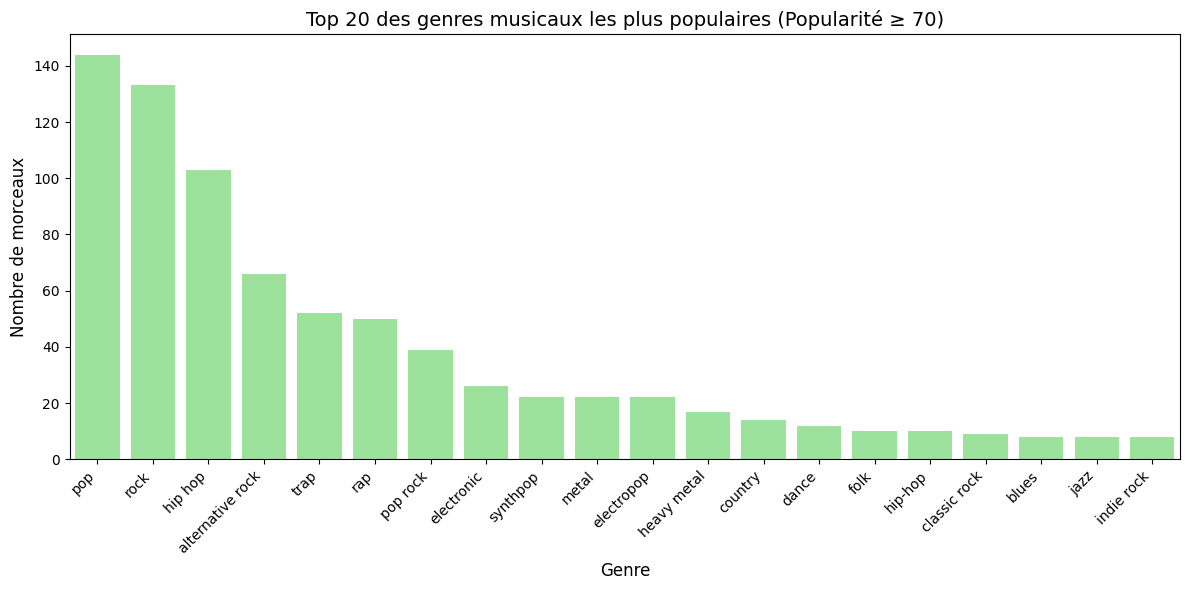

In [28]:
# Charger les données
df_highpop = df[df["Popularity"] >= 70]
df_expanded = df.assign(Genre=df_highpop['Genre'].str.split(',')).explode('Genre') # Séparer les genres multiples en plusieurs lignes
df_expanded['Genre'] = df_expanded['Genre'].str.strip()
top_20_genres = df_expanded['Genre'].value_counts().nlargest(20) # Compter les occurrences de chaque genre

# Tracer l'histogramme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values,color='lightgreen')
plt.title("Top 20 des genres musicaux les plus populaires (Popularité ≥ 70)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de morceaux", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

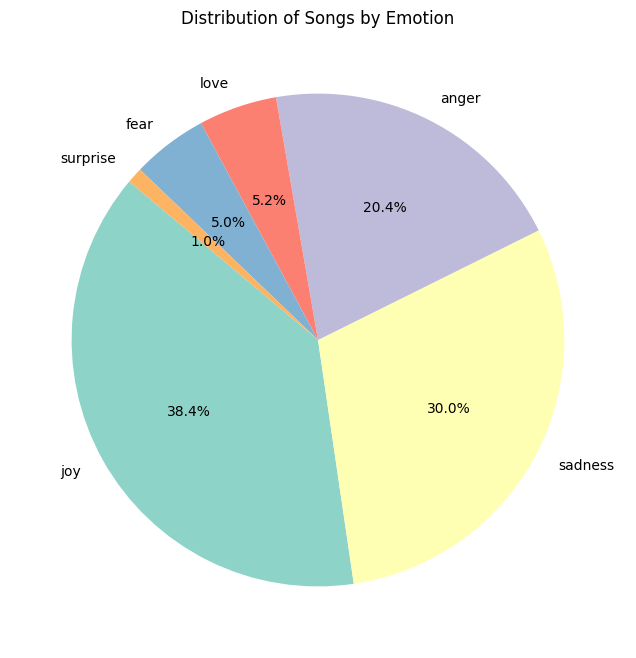

In [29]:
# Pie chart for emotion distribution
emotion_counts = df['emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Distribution of Songs by Emotion')
plt.show()

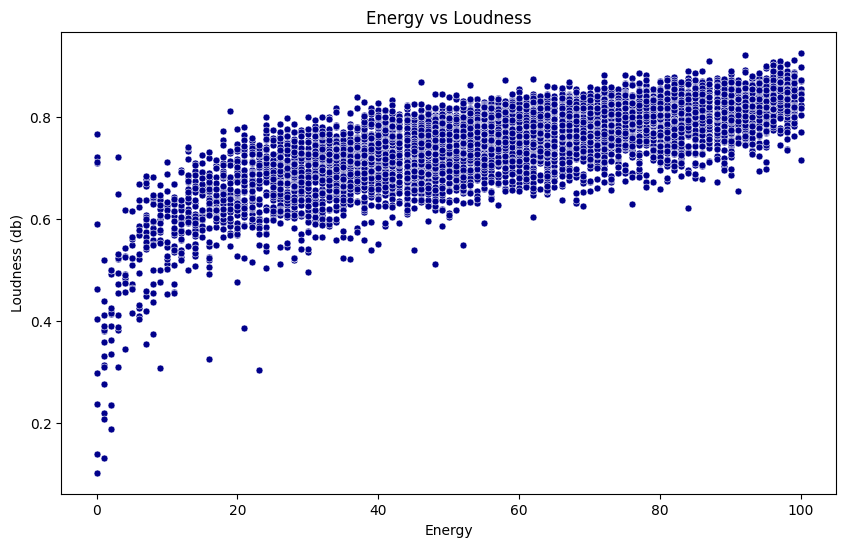

In [30]:
#Scatter plot de Energy vs Loudness ( variables trés dépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Loudness (db)', data=df, color='darkblue',s=25)
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness (db)')
plt.show()

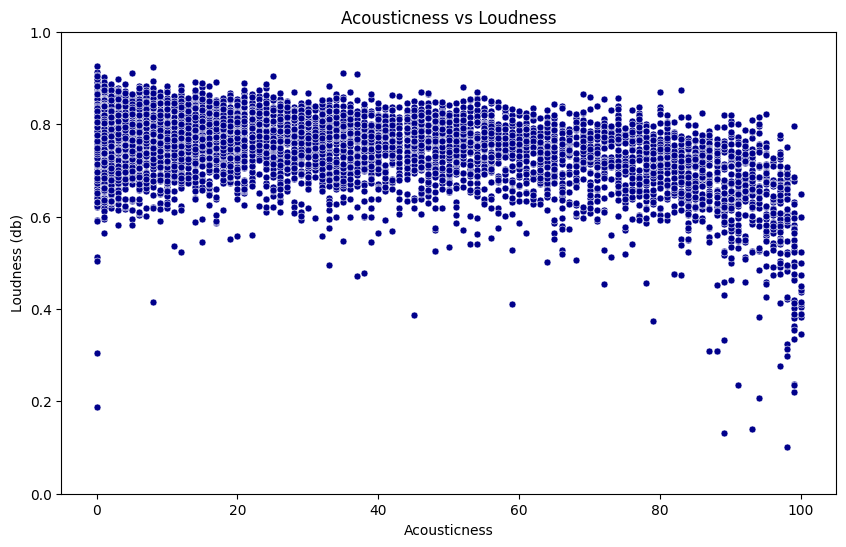

In [31]:
#Scatter plot de Acousticness vs Loudness ( variables trés dépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acousticness', y='Loudness (db)', data=df, color='darkblue',s=25)
plt.title('Acousticness vs Loudness')
plt.xlabel('Acousticness')
plt.ylim(0,1)
plt.ylabel('Loudness (db)')
plt.show()

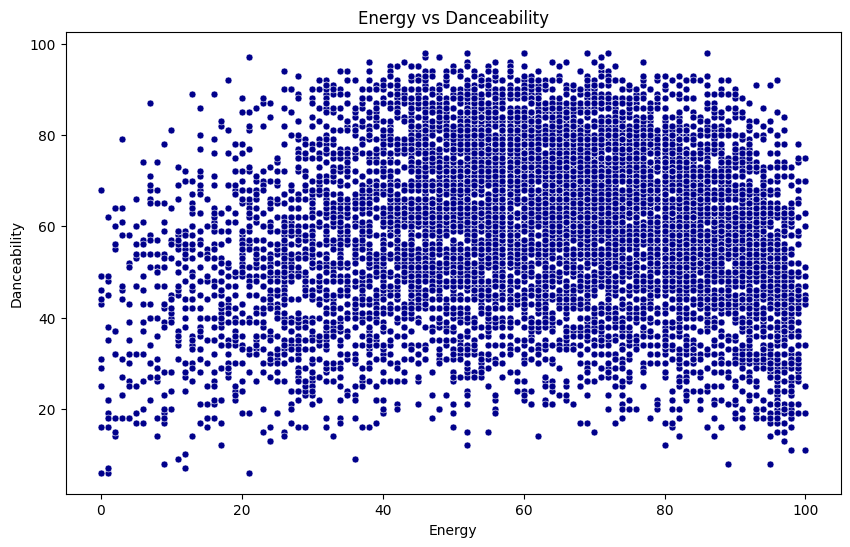

In [32]:
#Scatter plot de Energy vs Danceability ( variables Indépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Danceability', data=df, color='darkblue',s=25)
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

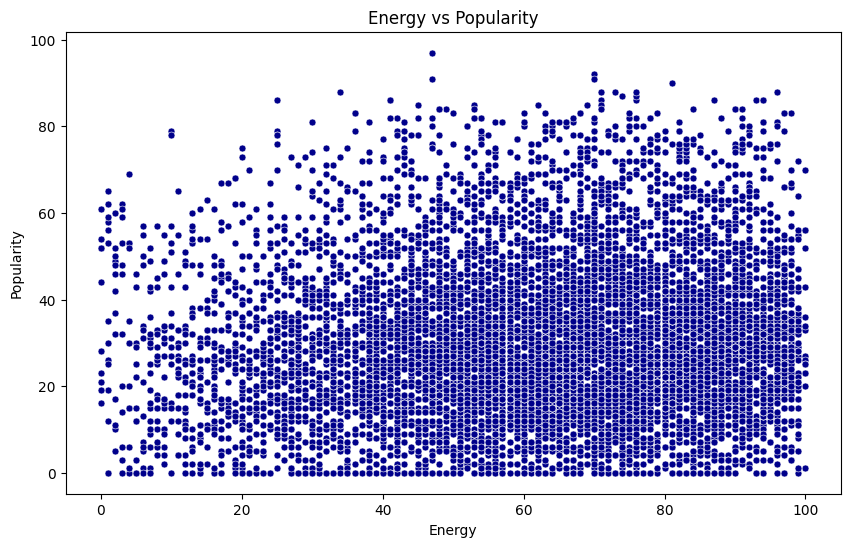

In [33]:
#Scatter plot de Energy vs Danceability ( variables Indépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Popularity', data=df, color='darkblue',s=25)
plt.title('Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

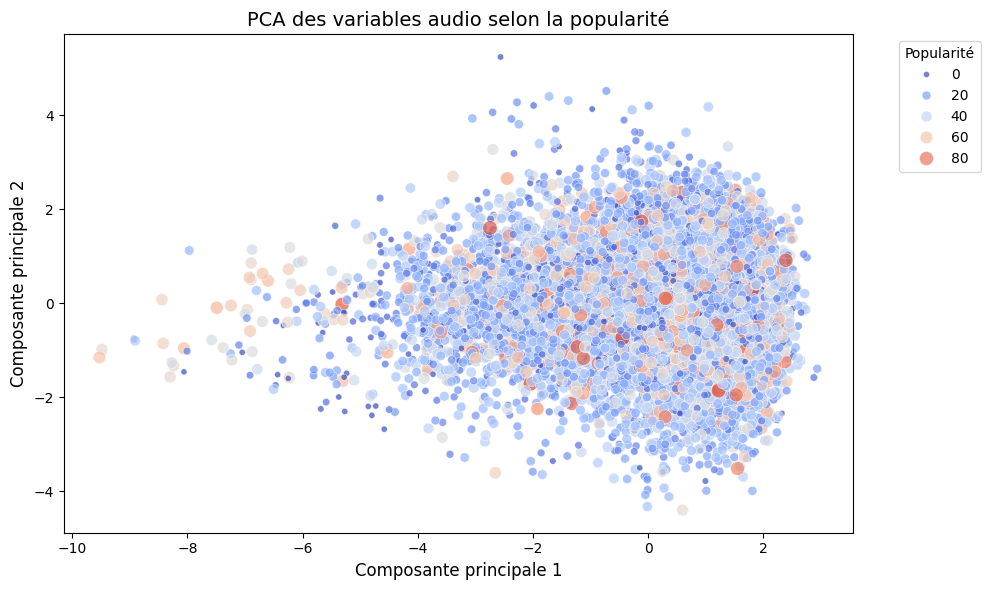

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convertir la colonne 'Key' en entier avec un mapping
musical_keys = {
    'C Maj': 0, 'C# Maj': 1, 'D Maj': 2, 'D# Maj': 3, 'E Maj': 4, 'F Maj': 5,
    'F# Maj': 6, 'G Maj': 7, 'G# Maj': 8, 'A Maj': 9, 'A# Maj': 10, 'B Maj': 11,
    'C min': 0, 'C# min': 1, 'D min': 2, 'D# min': 3, 'E min': 4, 'F min': 5,
    'F# min': 6, 'G min': 7, 'G# min': 8, 'A min': 9, 'A# min': 10, 'B min': 11
}
df['Key'] = df['Key'].map(musical_keys)

# Supprimer les lignes avec Key ou autres colonnes manquantes
features = ['Tempo', 'Key', 'Danceability', 'Positiveness', 'Energy',
            'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness', 'Loudness (db)']
df_clean = df.dropna(subset=features + ['Popularity'])

# Séparer X et y
X = df_clean[features]
y = df_clean['Popularity']

# Standardiser les données
X_scaled = StandardScaler().fit_transform(X)

# Appliquer la PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=y, 
    palette='coolwarm', 
    size=y, 
    sizes=(20, 120), 
    alpha=0.7
)
plt.title("PCA des variables audio selon la popularité", fontsize=14)
plt.xlabel("Composante principale 1", fontsize=12)
plt.ylabel("Composante principale 2", fontsize=12)
plt.legend(title="Popularité", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()